In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

    Since t-SNE is primaraly visualization technique, in order to evaluate its performance we need to compare visualization produced by t-SNE with the ones obtained using other non-parametric visualization techniques for multidimentional data, such as Multidimentional scaling using SMACOF (Scaling by MAjorizing a COmplicated Function) algorithm, Isomap, LLE, PCA and Laplacian Eigenmaps. 
    
    We experimented with 3 datasets from different application domains. Those are Olivetti faces dataset, small handrwitten digits dataset and [third]. 
    
    Olivetti faces dataset contains 400 64 x 64 grayscale images of faces (10 images for each of 40 subjects). Those images were taken at different time with different datails varying, such as face expression, lighting and facial details (absence or presence of glasses). They are labeled according to the identity of the person depicted.
    
    Handwritten digits dataset consists of 1797 8 x 8 grayscale images of handwritten digits of 10 classes. There are nearly 180 instances per digit class in this dataset. 
    
    

## Olivetti faces dataset

In [23]:
file = datasets.fetch_olivetti_faces(
    data_home='/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/src/data/')

In [24]:
def imscatter(x, y, images, ax=None, zoom=1):        
    x, y = np.atleast_1d(x, y)
    for x0, y0, i0 in zip(x, y, images):
        ab = AnnotationBbox(OffsetImage(i0, zoom = zoom, cmap = 'gray'), (x0, y0), xycoords='data', frameon=False)
        ax.add_artist(ab)
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

In [25]:
data = file.data

In [26]:
y = file.target

In [27]:
images = file.images
images.shape

(400, 64, 64)

### t-SNE

In [18]:
from tSNE import tSNE

Computing P-values for 391/400 point.
Mean value of sigma: 2.947863


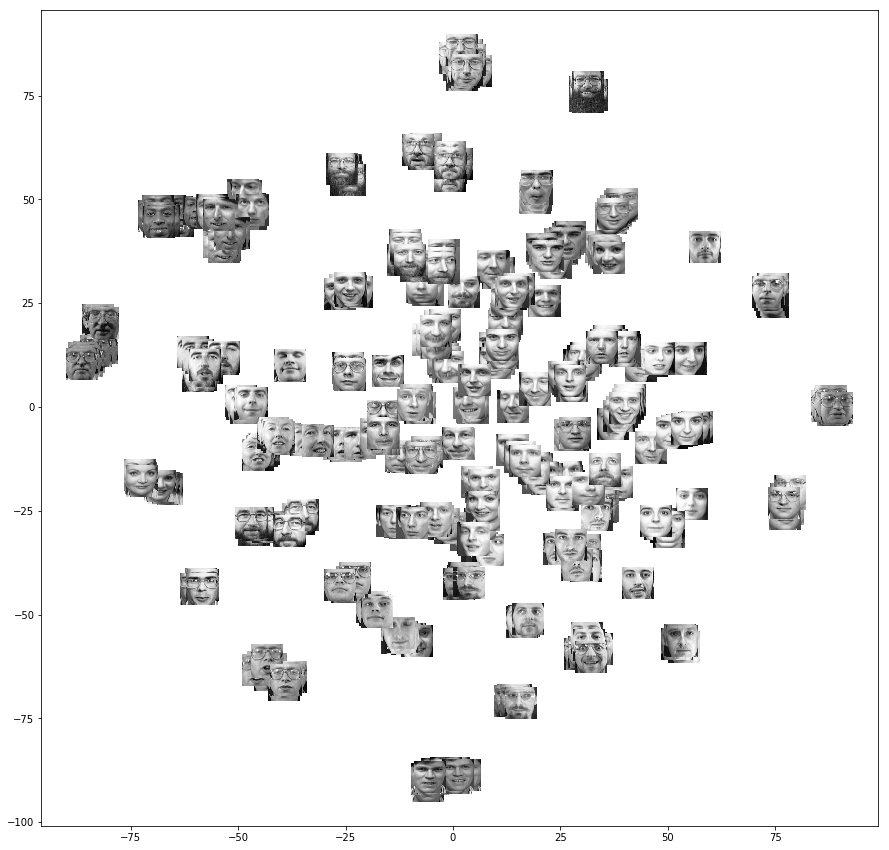

In [30]:
points = tSNE(out_dims=2, perplexity=5).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.images
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=0.5, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/tsne_1.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### MDS using SMACOF algorithm

In [10]:
from sklearn.manifold import MDS

In [ ]:
points = MDS(n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.images
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=0.5, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/mds_1.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### Isomap

In [11]:
from sklearn.manifold import Isomap

In [ ]:
points = Isomap(n_neighbors=5, n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.images
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=0.5, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/isomap_1.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### LLE

In [12]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
points = LocallyLinearEmbedding(n_neighbors=12, n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.images
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=0.5, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/lle_1.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### PCA

In [17]:
from sklearn.decomposition import PCA

In [ ]:
points = PCA(n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.images
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=0.5, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/pca_1.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### Laplacian Eigenmaps

In [7]:
from sklearn.manifold import SpectralEmbedding

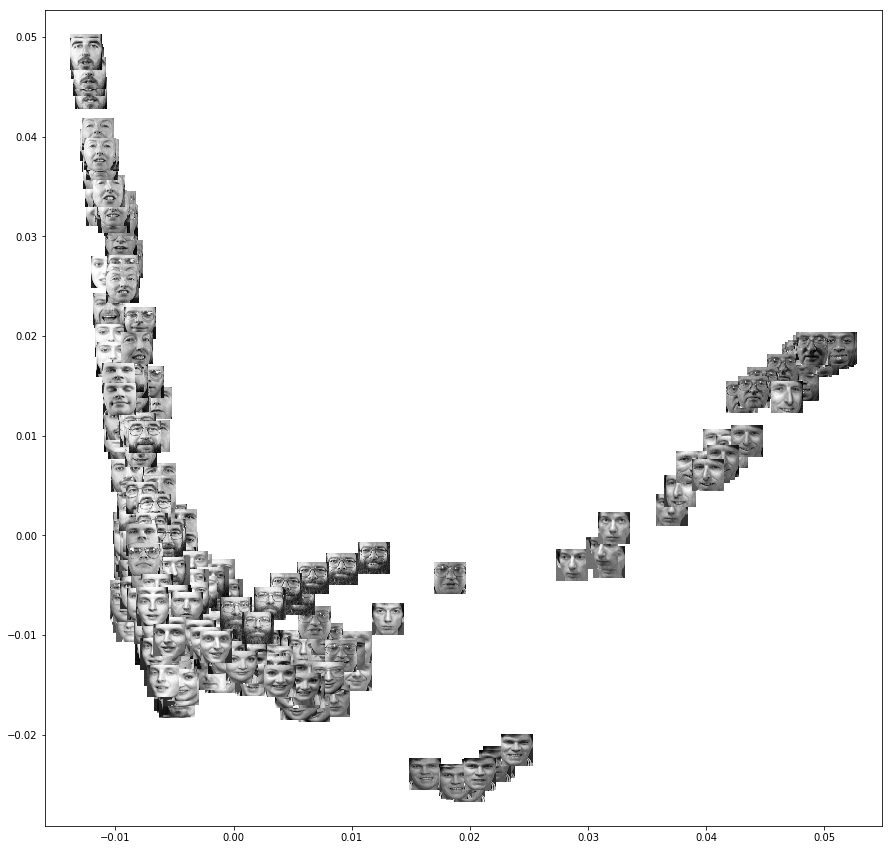

In [12]:
points = SpectralEmbedding(n_components=2, n_neighbors=12).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.images
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=0.5, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/lap_1.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

## Handwritten digits dataset

In [13]:
file = datasets.load_digits()

In [14]:
data = file.data

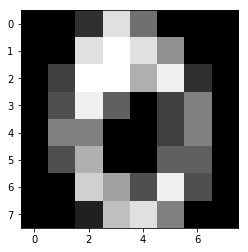

In [15]:
import random

plt.imshow(file.data[random.randint(0, file.data.shape[0])].reshape((8,8)), cmap = 'gray')
plt.show()

### t-SNE

In [7]:
from tSNE import tSNE

points = tSNE(n_iter=1000, out_dims=2, perplexity=5).fit_transform(data)

Computing P-values for 1791/1797 point.
Mean value of sigma: 0.468765


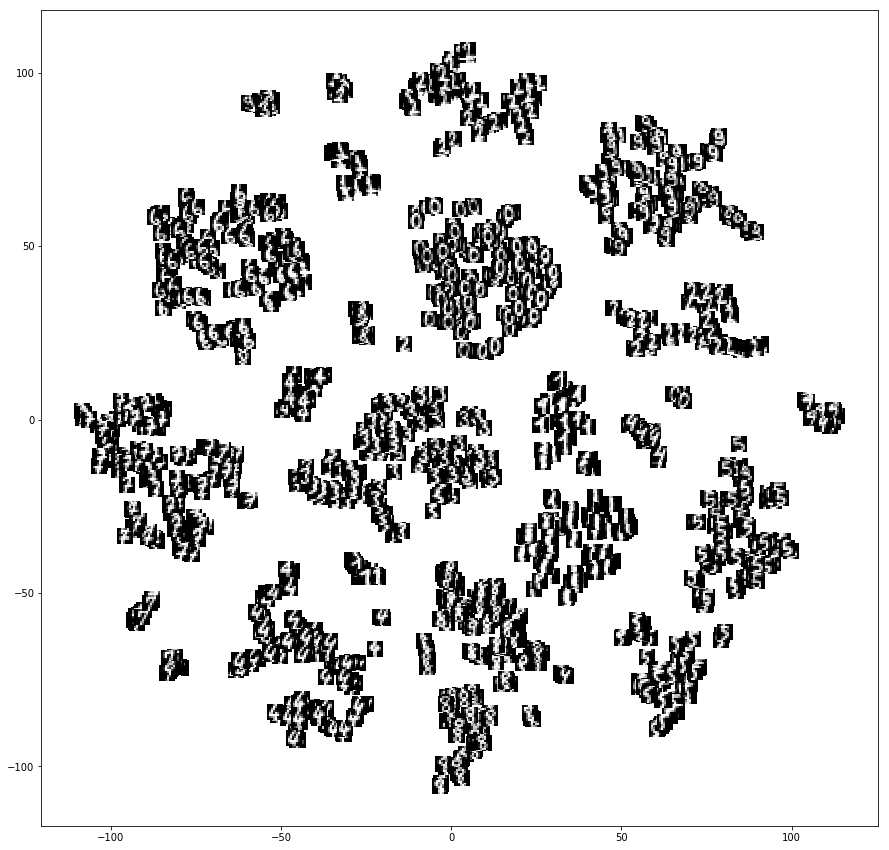

In [8]:
x = points[:, 0]
y = points[:, 1]
    
images = file.data.reshape((1797, 8, 8))
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=2, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/tsne_2.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### MDS using SMACOF algorithm

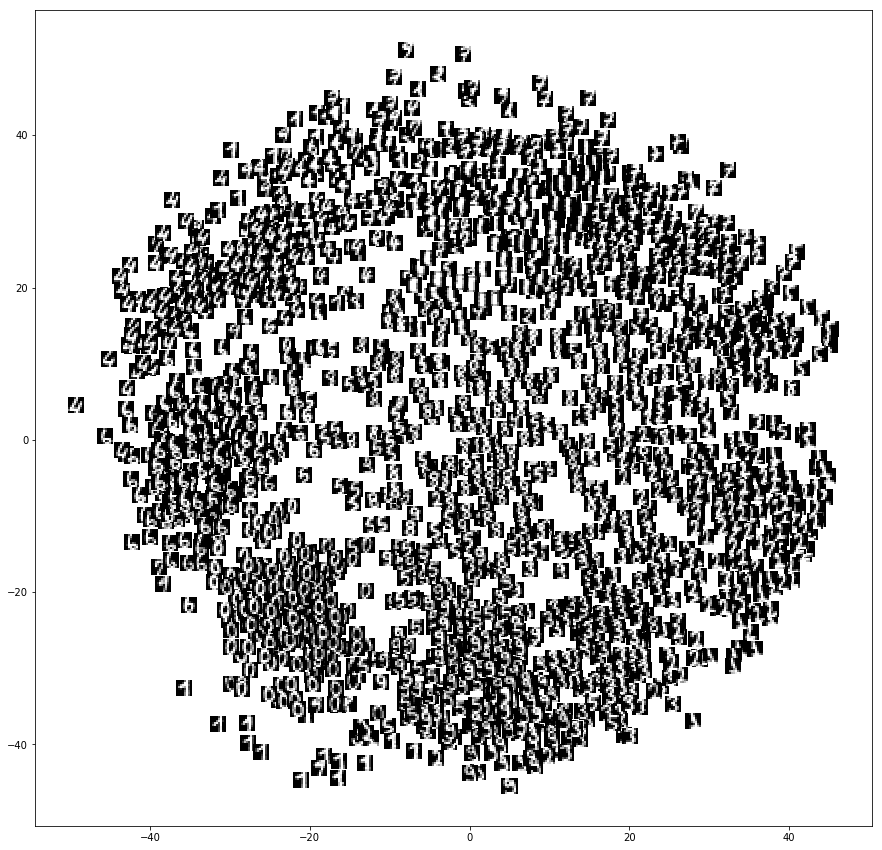

In [15]:
points = MDS(n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.data.reshape((1797, 8, 8))
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=2, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/mds_2.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### Isomap

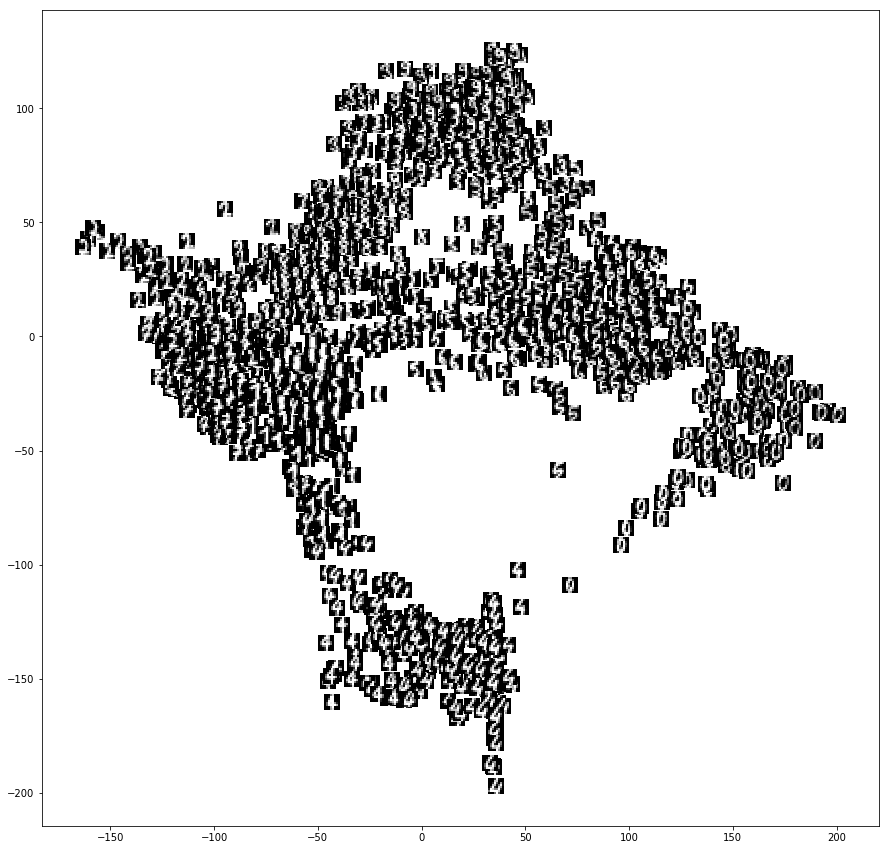

In [16]:
points = Isomap(n_neighbors=5, n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.data.reshape((1797, 8, 8))
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=2, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/isomap_2.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### LLE

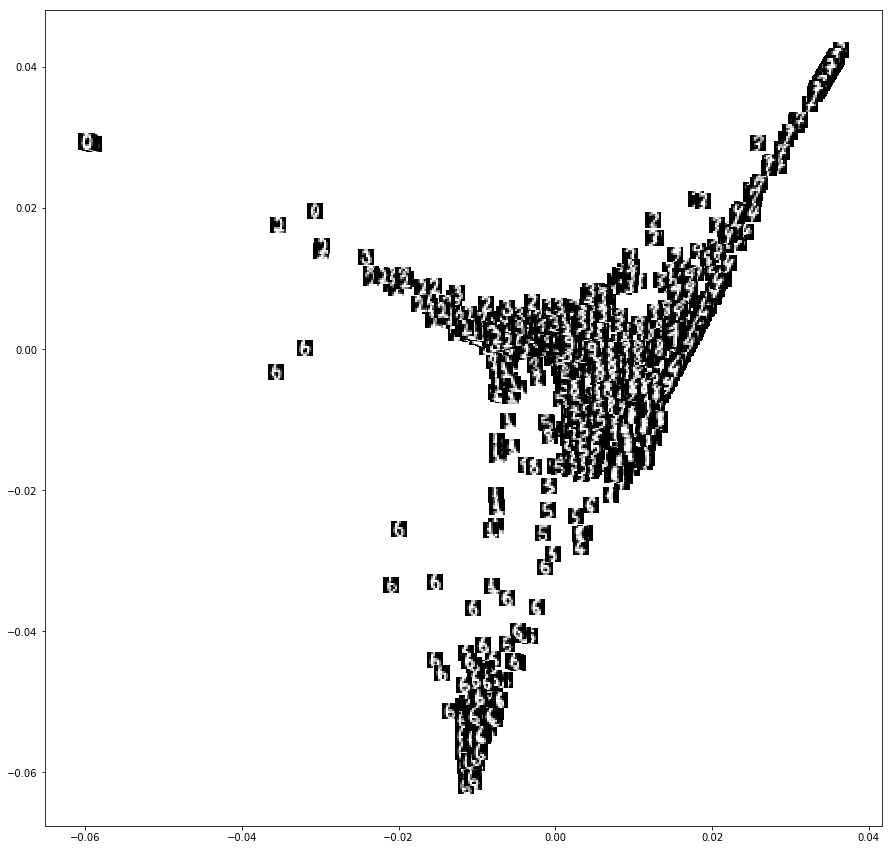

In [17]:
points = LocallyLinearEmbedding(n_neighbors=12, n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.data.reshape((1797, 8, 8))
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=2, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/lle_2.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### PCA

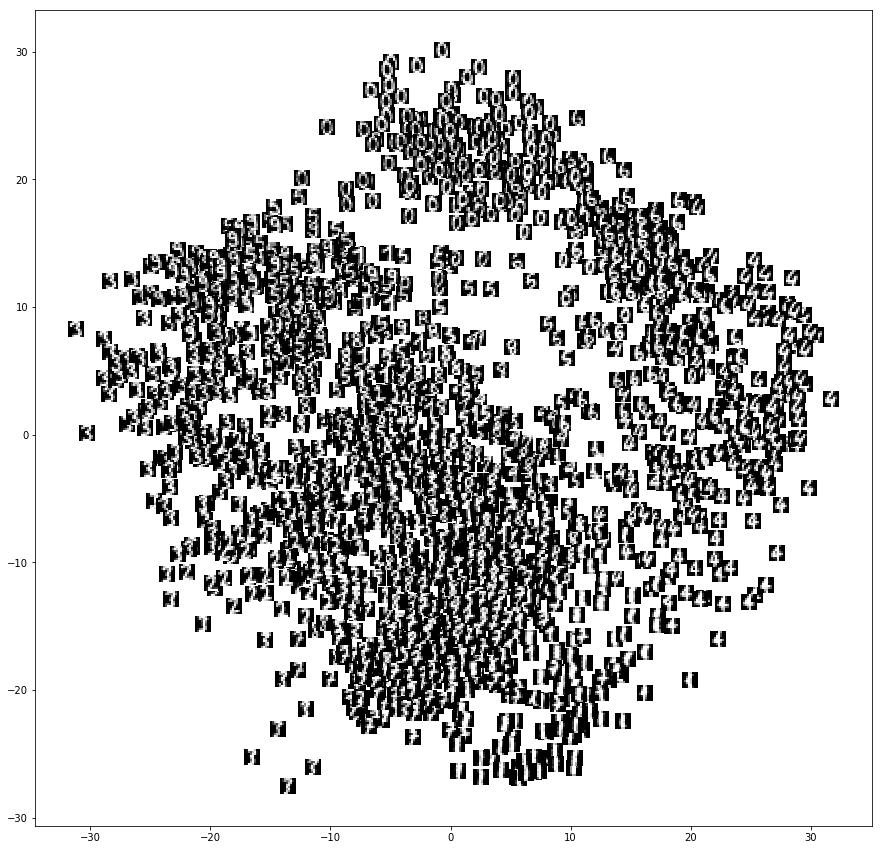

In [18]:
points = PCA(n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.data.reshape((1797, 8, 8))
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=2, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/pca_2.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()

### Laplacian Eigenmaps

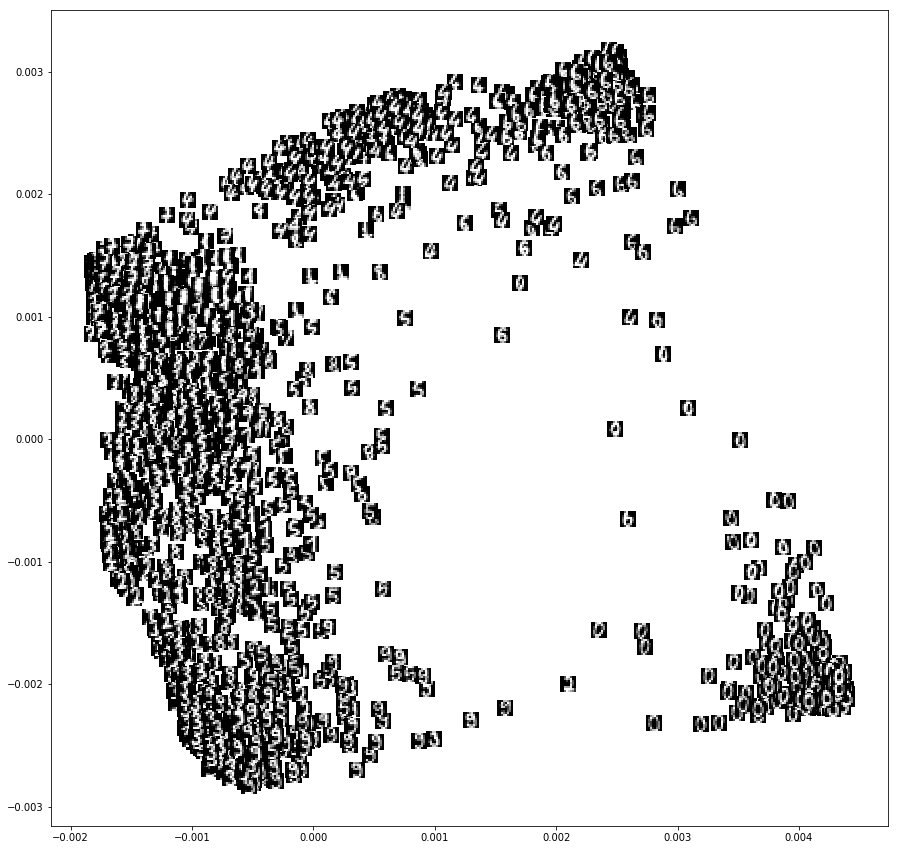

In [16]:
points = SpectralEmbedding(n_components=2).fit_transform(data)

x = points[:, 0]
y = points[:, 1]
    
images = file.data.reshape((1797, 8, 8))
    
fig, ax = plt.subplots(figsize = (15,15))
imscatter(x, y, images, zoom=2, ax=ax)
    
ax.scatter(x, y)
plt.savefig('/home/dinamic/Desktop/MASTERS/linear/solutions/la-tSNE-final-project/doc/figures/lap_2.png', 
            bbox_inches='tight', pad_inches=0)
plt.show()